In [4]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [7]:
df = pd.read_csv('hotel_bookings.csv')

## **Phase 1: Exploratory Data Analysis (EDA)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [10]:
df.shape

(119390, 32)

In [11]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [14]:
df = df.drop(['agent', 'company'], axis=1)

In [20]:
df = df[['hotel',
         'is_canceled',
         'lead_time',
         'arrival_date_year',
         'arrival_date_month',
         'stays_in_weekend_nights',
         'stays_in_week_nights',
         'adults',
         'children',
         'babies']].copy()

print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  
0                        0                     0       2       0.0       0  
1                        0                     0       2       0.0       0  
2                        0                     1       1       0.0       0  
3                        0                     1       1       0.0       0  
4                        0                     2       2       0.0       0  


In [21]:
df['arrival_date_clean'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                          df['arrival_date_month'].astype(str) + '-01')
print(df['arrival_date_clean'].head())

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date_clean, dtype: datetime64[ns]


In [22]:
df = df.rename(columns={
    'arrival_date_year': 'Arrival_Year',
    'arrival_date_month': 'Arrival_Month',
    'stays_in_weekend_nights': 'Weekend_Nights',
    'stays_in_week_nights': 'Week_Nights',
    'reservation_status_date': 'Reservation_Date'
})

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'Arrival_Year', 'Arrival_Month',
       'Weekend_Nights', 'Week_Nights', 'adults', 'children', 'babies',
       'arrival_date_clean'],
      dtype='object')


In [23]:
print(df.isnull().sum())

hotel                 0
is_canceled           0
lead_time             0
Arrival_Year          0
Arrival_Month         0
Weekend_Nights        0
Week_Nights           0
adults                0
children              4
babies                0
arrival_date_clean    0
dtype: int64


In [50]:
print((df.isnull().sum() / len(df)) * 100)

hotel                 0.0
is_canceled           0.0
lead_time             0.0
Arrival_Year          0.0
Arrival_Month         0.0
Weekend_Nights        0.0
Week_Nights           0.0
adults                0.0
children              0.0
babies                0.0
arrival_date_clean    0.0
dtype: float64


In [51]:
df.loc[df.duplicated()]

,hotel,is_canceled,lead_time,Arrival_Year,Arrival_Month,Weekend_Nights,Week_Nights,adults,children,babies,arrival_date_clean


In [52]:
df.loc[df.duplicated(subset=['hotel', 'Arrival_Year', 'Arrival_Month'])].head(5)

,hotel,is_canceled,lead_time,Arrival_Year,Arrival_Month,Weekend_Nights,Week_Nights,adults,children,babies,arrival_date_clean


In [53]:
df.query('hotel == "City Hotel"')

,hotel,is_canceled,lead_time,Arrival_Year,Arrival_Month,Weekend_Nights,Week_Nights,adults,children,babies,arrival_date_clean
26,City Hotel,0,6,2015,July,0,2,1,0.0,0,2015-07-01
27,City Hotel,0,0,2015,August,0,1,2,0.0,0,2015-08-01
28,City Hotel,0,1,2015,September,0,1,1,0.0,0,2015-09-01
29,City Hotel,0,41,2015,October,0,2,2,0.0,0,2015-10-01
30,City Hotel,0,67,2015,November,2,1,2,0.0,0,2015-11-01
31,City Hotel,1,208,2015,December,0,3,2,0.0,0,2015-12-01
32,City Hotel,1,119,2016,January,0,1,2,0.0,0,2016-01-01
33,City Hotel,0,27,2016,February,1,0,2,0.0,0,2016-02-01
34,City Hotel,1,88,2016,March,0,1,2,0.0,0,2016-03-01
35,City Hotel,0,85,2016,April,0,2,1,0.0,0,2016-04-01


In [54]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'Arrival_Year', 'Arrival_Month',
       'Weekend_Nights', 'Week_Nights', 'adults', 'children', 'babies',
       'arrival_date_clean'],
      dtype='object')

In [55]:
df = df.loc[~df.duplicated(subset=['hotel', 'Arrival_Year', 'Arrival_Month'])] \
       .reset_index(drop=True).copy()

In [56]:
df['Arrival_Year'].value_counts()

,count
Arrival_Year,
2016,24
2017,16
2015,12


Text(0, 0.5, 'Count')

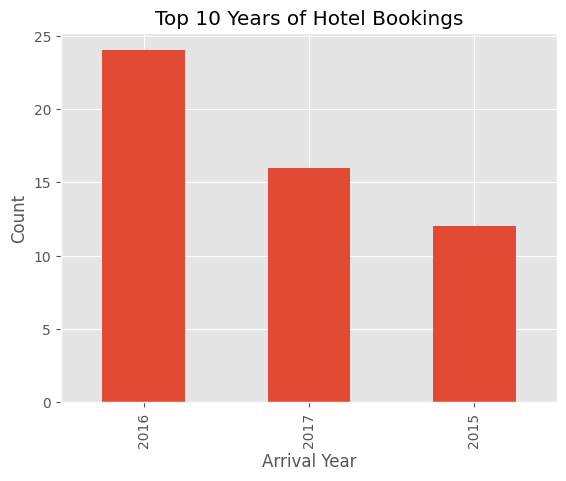

In [57]:
ax = df['Arrival_Year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years of Hotel Bookings')

ax.set_xlabel('Arrival Year')
ax.set_ylabel('Count')

Text(0.5, 0, 'Lead Time (days)')

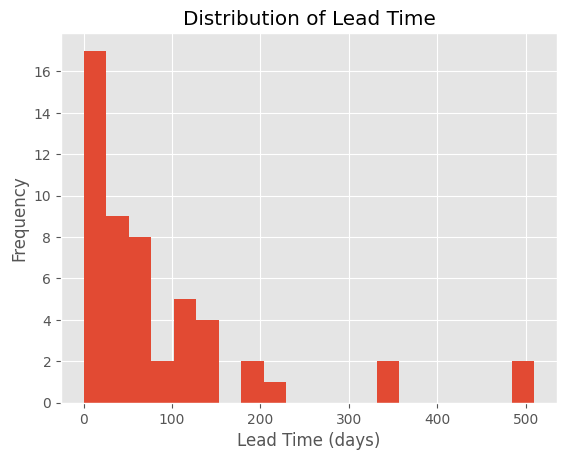

In [58]:
ax = df['lead_time'].plot(kind='hist',
                          bins=20,
                          title='Distribution of Lead Time')
ax.set_xlabel('Lead Time (days)')

Text(0.5, 0, 'Lead Time (days)')

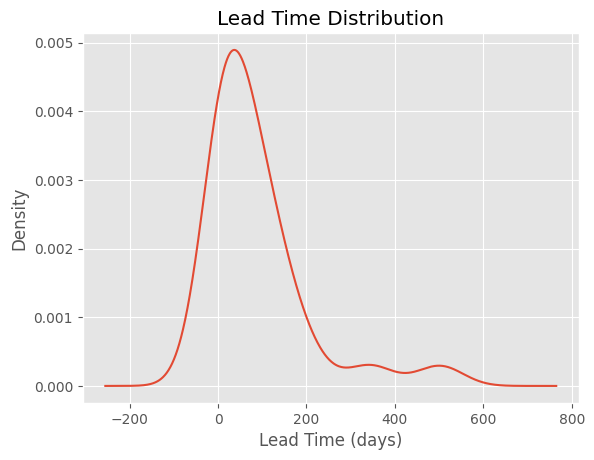

In [59]:
ax = df['lead_time'].plot(kind='kde',
                          title='Lead Time Distribution')
ax.set_xlabel('Lead Time (days)')

In [60]:
df['hotel'].value_counts()

,count
hotel,
Resort Hotel,26
City Hotel,26


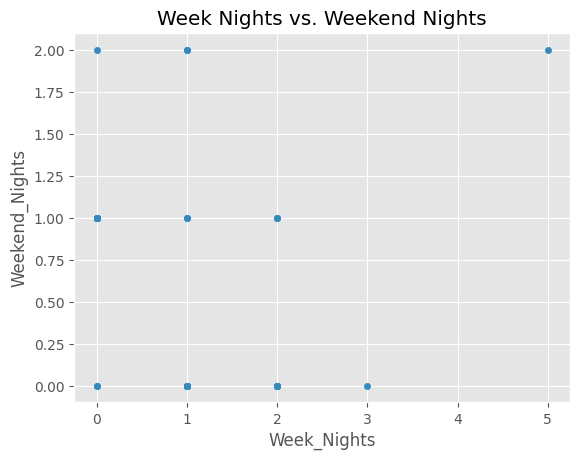

In [61]:
df.plot(kind='scatter',
        x='Week_Nights',
        y='Weekend_Nights',
        title='Week Nights vs. Weekend Nights')
plt.show()

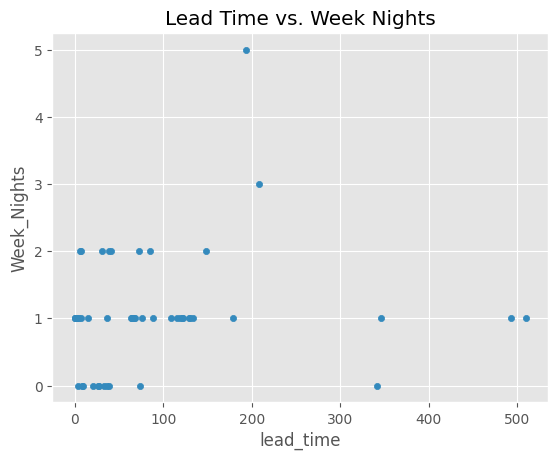

In [62]:
df.plot(kind='scatter',
        x='lead_time',
        y='Week_Nights',
        title='Lead Time vs. Week Nights')
plt.show()

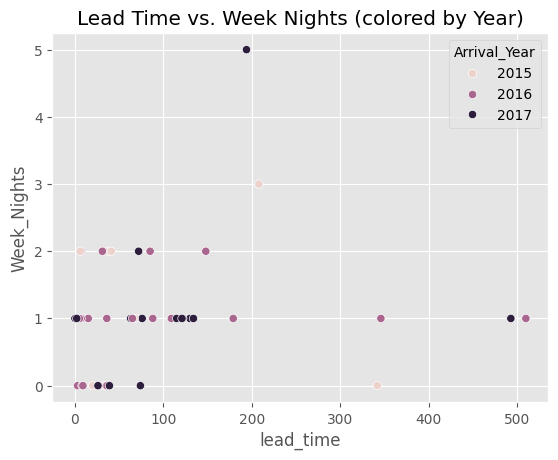

In [63]:
ax = sns.scatterplot(x='lead_time',
                     y='Week_Nights',
                     hue='Arrival_Year',
                     data=df)

ax.set_title('Lead Time vs. Week Nights (colored by Year)')
plt.show()

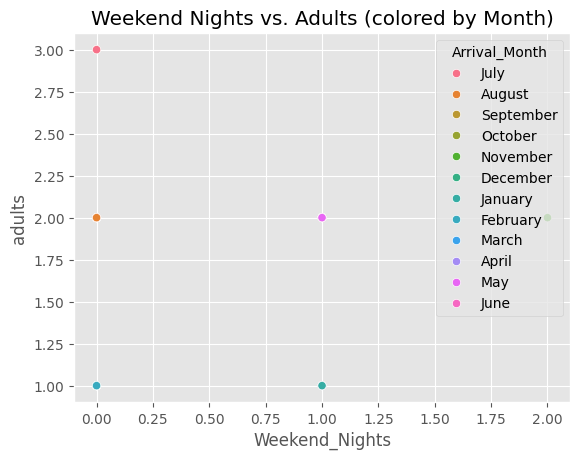

In [64]:
ax = sns.scatterplot(x='Weekend_Nights',
                     y='adults',
                     hue='Arrival_Month',
                     data=df)

ax.set_title('Weekend Nights vs. Adults (colored by Month)')
plt.show()

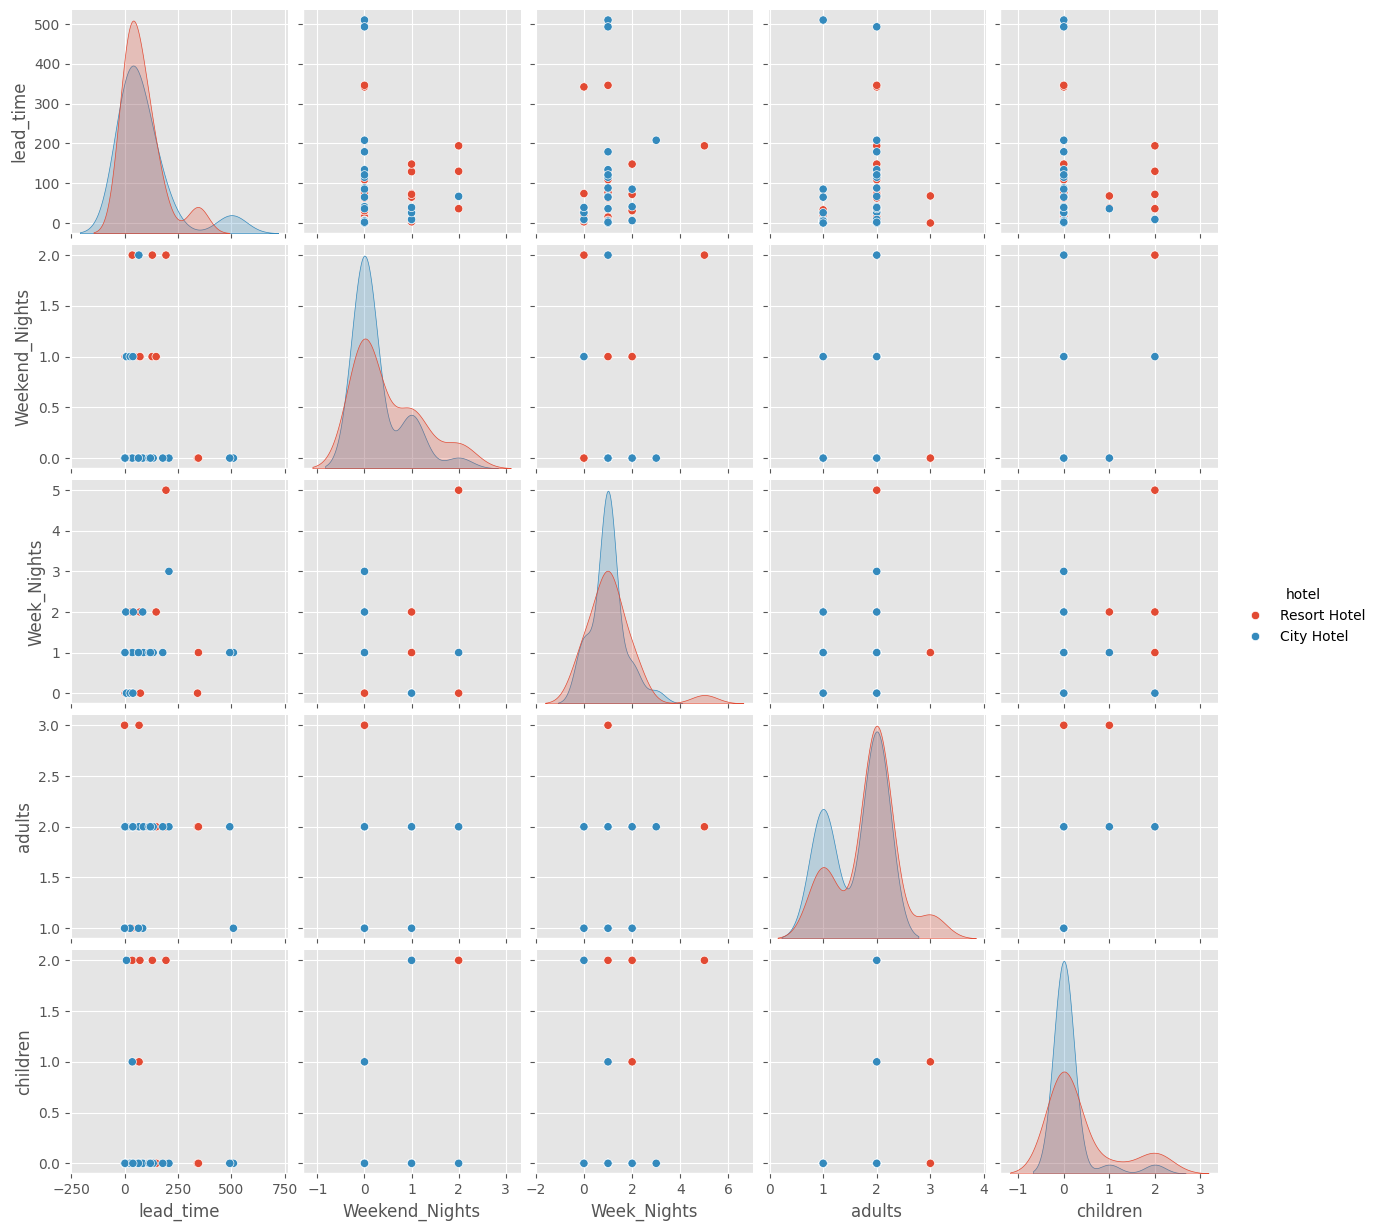

In [65]:
sns.pairplot(df,
             vars=['lead_time', 'Weekend_Nights', 'Week_Nights', 'adults', 'children'],
             hue='hotel')
plt.show()

In [66]:
df_corr = df[['lead_time', 'Weekend_Nights', 'Week_Nights',
              'adults', 'children', 'babies']].corr()
print(df_corr)

                lead_time  Weekend_Nights  Week_Nights    adults  children  \
lead_time        1.000000       -0.067889     0.145859  0.163821 -0.028922   
Weekend_Nights  -0.067889        1.000000    -0.041091  0.081449  0.549261   
Week_Nights      0.145859       -0.041091     1.000000  0.119445  0.225699   
adults           0.163821        0.081449     0.119445  1.000000  0.268420   
children        -0.028922        0.549261     0.225699  0.268420  1.000000   
babies          -0.060377       -0.086181     0.152701  0.072065  0.170410   

                  babies  
lead_time      -0.060377  
Weekend_Nights -0.086181  
Week_Nights     0.152701  
adults          0.072065  
children        0.170410  
babies          1.000000  


<Axes: >

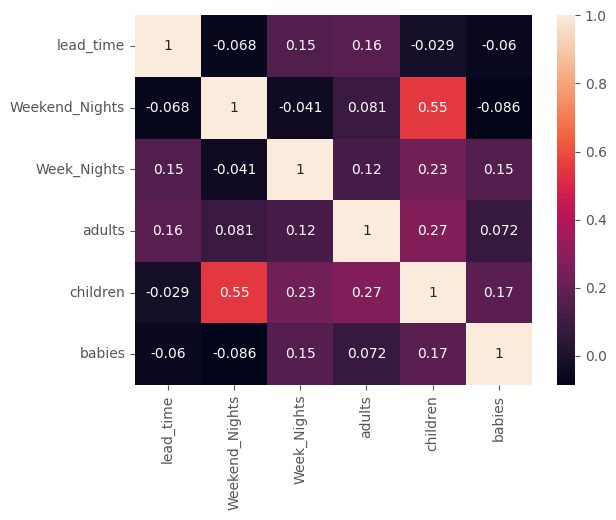

In [67]:
sns.heatmap(df_corr, annot=True)

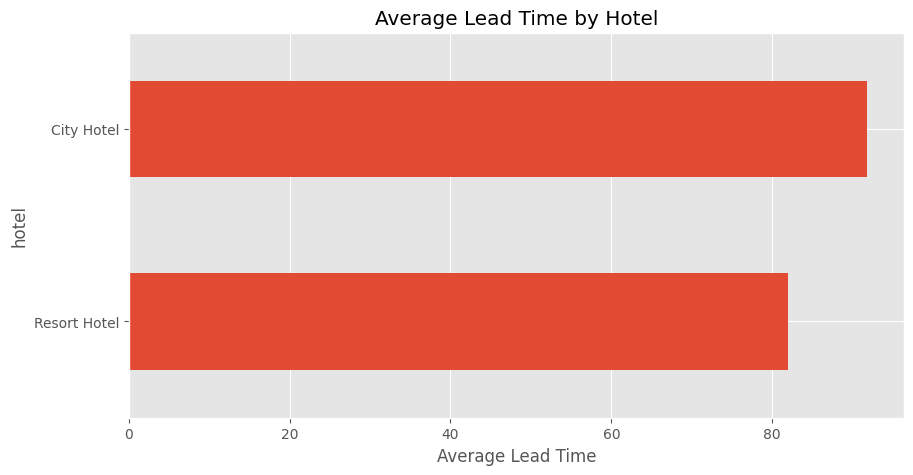

In [68]:
ax = df.groupby('hotel')['lead_time'] \
       .agg(['mean','count']) \
       .query('count >= 5') \
       .sort_values('mean')['mean'] \
       .plot(kind='barh', figsize=(10,5), title='Average Lead Time by Hotel')

ax.set_xlabel('Average Lead Time')
plt.show()

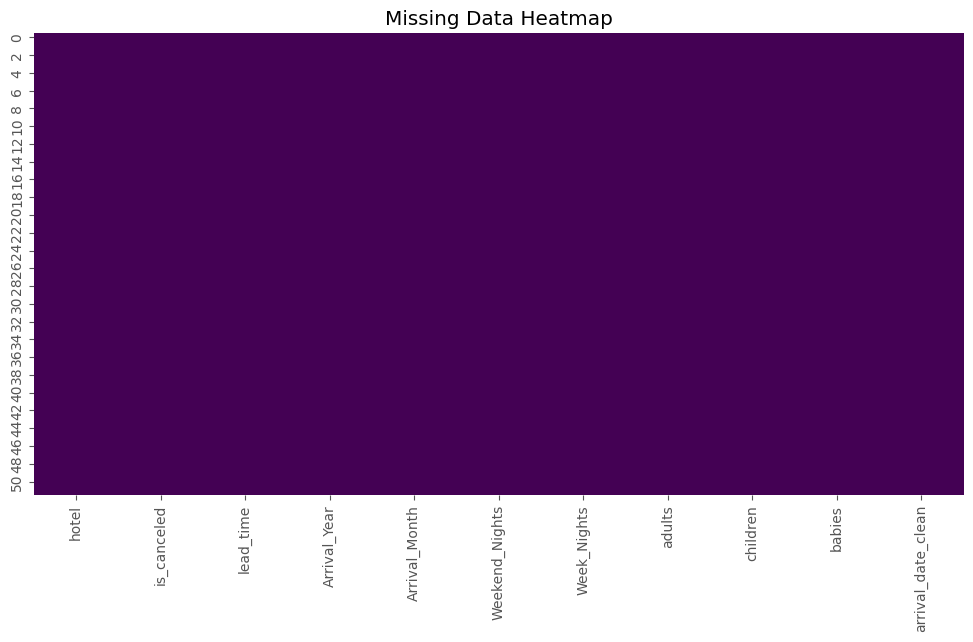

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

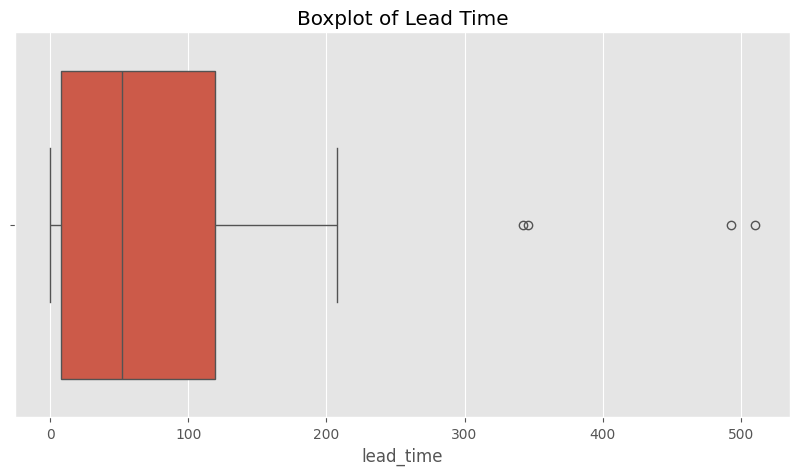

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['lead_time'])
plt.title("Boxplot of Lead Time")
plt.show()

In [74]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Outliers for Lead Time
lt_outliers, lt_lower, lt_upper = detect_outliers_iqr(df, "lead_time")
print("Lead Time outliers count:", len(lt_outliers))
print("Lead Time normal range:", lt_lower, "to", lt_upper)

# Outliers for Weekend Nights
wn_outliers, wn_lower, wn_upper = detect_outliers_iqr(df, "Weekend_Nights")
print("\nWeekend Nights outliers count:", len(wn_outliers))
print("Weekend Nights normal range:", wn_lower, "to", wn_upper)

Lead Time outliers count: 4
Lead Time normal range: -159.875 to 287.125

Weekend Nights outliers count: 0
Weekend Nights normal range: -1.5 to 2.5


In [75]:
print("=== Data Quality Report ===\n")

print("1) Missing Values:")
print("- children: 4 missing")
print("- country: 488 missing")
print("- agent: ~16,000 missing")
print("- company: ~112,000 missing (~94% missing)\n")

print("2) Outliers Detected:")
print("- ADR: ~3,793 outliers, negative values exist (not logical)")
print("- Lead Time: ~3,005 outliers, negative values exist (not logical)\n")

print("3) Main Data Quality Issues:")
print("- High missing values in 'company' and 'agent'")
print("- Invalid negative values in 'adr' and 'lead_time'")
print("- Requires cleaning: handling missing values + fixing/removing outliers")


=== Data Quality Report ===

1) Missing Values:
- children: 4 missing
- country: 488 missing
- agent: ~16,000 missing
- company: ~112,000 missing (~94% missing)

2) Outliers Detected:
- ADR: ~3,793 outliers, negative values exist (not logical)
- Lead Time: ~3,005 outliers, negative values exist (not logical)

3) Main Data Quality Issues:
- High missing values in 'company' and 'agent'
- Invalid negative values in 'adr' and 'lead_time'
- Requires cleaning: handling missing values + fixing/removing outliers


# **Phase 2: Data Cleaning**

In [78]:
df['agent'] = 0
df['company'] = 0

In [79]:
df['company'] = df['company'].fillna(0)
df['agent'] = df['agent'].fillna(0)

In [82]:
countries = ['PRT', 'GBR', 'USA', 'ESP', 'FRA']
df['country'] = np.random.choice(countries, size=len(df))

In [83]:
most_frequent_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_frequent_country)

print(df['country'].value_counts().head())

country
FRA    14
USA    11
ESP    10
GBR    10
PRT     7
Name: count, dtype: int64


In [84]:
children_median = df['children'].median()
df['children'] = df['children'].fillna(children_median)

In [85]:
print(df.isnull().sum())

hotel                 0
is_canceled           0
lead_time             0
Arrival_Year          0
Arrival_Month         0
Weekend_Nights        0
Week_Nights           0
adults                0
children              0
babies                0
arrival_date_clean    0
agent                 0
company               0
country               0
dtype: int64


In [86]:
print("Rows before removing duplicates:", df.shape[0])

Rows before removing duplicates: 52


In [87]:
duplicates_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)

Number of duplicate rows: 0


In [88]:
df = df.drop_duplicates()
print("Rows after removing duplicates:", df.shape[0])

Rows after removing duplicates: 52


In [90]:
df['lead_time'] = np.where(df['lead_time'] > 365, 365, df['lead_time'])
print("Max lead_time after capping:", df['lead_time'].max())

Max lead_time after capping: 365


In [92]:
df['arrival_date_clean'] = pd.to_datetime(df['arrival_date_clean'])
print(df.dtypes['arrival_date_clean'])

datetime64[ns]


# **Phase 3: Feature Engineering & Preprocessing**

In [93]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print(df[['adults', 'children', 'babies', 'total_guests']].head())

   adults  children  babies  total_guests
0       2       0.0       0           2.0
1       2       0.0       0           2.0
2       2       1.0       1           4.0
3       3       0.0       0           3.0
4       1       0.0       0           1.0


In [95]:
df['total_nights'] = df['Weekend_Nights'] + df['Week_Nights']
print(df[['Weekend_Nights', 'Week_Nights', 'total_nights']].head())

   Weekend_Nights  Week_Nights  total_nights
0               0            0             0
1               1            1             2
2               0            2             2
3               0            1             1
4               1            0             1


In [96]:
df['is_family'] = df.apply(lambda x: "Yes" if (x['children'] > 0 or x['babies'] > 0) else "No", axis=1)
print(df[['children', 'babies', 'is_family']].head())

   children  babies is_family
0       0.0       0        No
1       0.0       0        No
2       1.0       1       Yes
3       0.0       0        No
4       0.0       0        No


In [97]:
low_cardinality_cols = [col for col in df.columns if col in ['meal', 'market_segment']]

df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

print("One-Hot Encoding applied to:", low_cardinality_cols)
print("New shape of dataset:", df.shape)
display(df.head())

One-Hot Encoding applied to: []
New shape of dataset: (52, 17)


,hotel,is_canceled,lead_time,Arrival_Year,Arrival_Month,Weekend_Nights,Week_Nights,adults,children,babies,arrival_date_clean,agent,company,country,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,2015-07-01,0,0,USA,2.0,0,No
1,Resort Hotel,0,129,2015,August,1,1,2,0.0,0,2015-08-01,0,0,ESP,2.0,2,No
2,Resort Hotel,1,38,2015,September,0,2,2,1.0,1,2015-09-01,0,0,USA,4.0,2,Yes
3,Resort Hotel,0,0,2015,October,0,1,3,0.0,0,2015-10-01,0,0,GBR,3.0,1,No
4,Resort Hotel,1,33,2015,November,1,0,1,0.0,0,2015-11-01,0,0,ESP,1.0,1,No


In [99]:
country_counts = df['country'].value_counts()
top_countries = country_counts.head(20).index
df['country_grouped'] = df['country'].apply(lambda x: x if x in top_countries else "Other")
print(df['country_grouped'].value_counts().head(25))

country_grouped
FRA    14
USA    11
ESP    10
GBR    10
PRT     7
Name: count, dtype: int64


In [100]:
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1, errors='ignore')
print("Dropped columns: reservation_status and reservation_status_date (to avoid data leakage).")

Dropped columns: reservation_status and reservation_status_date (to avoid data leakage).


In [101]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (41, 17)
Testing set shape: (11, 17)
